<a href="https://colab.research.google.com/github/benasphy/DecisionTree/blob/main/Gym%20DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

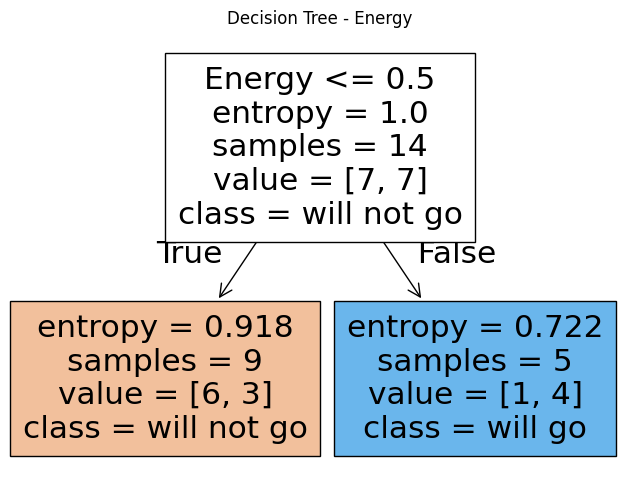

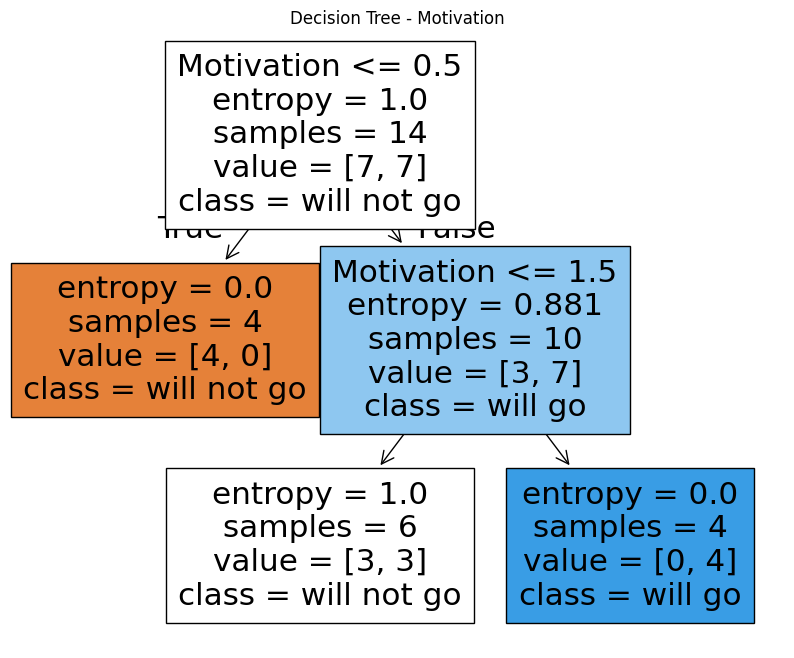

Energy based Decision Tree:
|--- Energy <= 0.50
|   |--- class: 0
|--- Energy >  0.50
|   |--- class: 1


 Motivation based Decision Tree:
|--- Motivation <= 0.50
|   |--- class: 0
|--- Motivation >  0.50
|   |--- Motivation <= 1.50
|   |   |--- class: 0
|   |--- Motivation >  1.50
|   |   |--- class: 1



In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

data = {
    "Energy": ["High", "High", "high", "Low", "Low", "Low", "Low", "Low", "Low", "High", "High", "High", "Low", "Low"],
    "Motivation": ["Highly Motivated", "Neutral", "No Motivation", "Neutral", "No Motivation", "Highly Motivated", "Neutral", "Highly Motivated", "Neutral", "Highly Motivated", "Neutral", "No Motivation", "No Motivation", "Neutral"],
    "Gym":[1,1,0,0,0,1,1,1,0,1,1,0,0,0]
}

df = pd.DataFrame(data)

#Encoding
df["Energy"] = df["Energy"].map({"High": 1, "Low": 0})
df["Motivation"] = df["Motivation"].map({"Highly Motivated": 2, "Neutral": 1, "No Motivation": 0})
X = df[["Energy", "Motivation"]]
y = df["Gym"]

#Training the Energy tree

tree_energy = DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
tree_energy.fit(X[["Energy"]], y)

#Training the Motivation tree

tree_motivation = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
tree_motivation.fit(X[["Motivation"]], y)

#Visualizing the energy based Tree

plt.figure(figsize = (8,6))
plot_tree(tree_energy, feature_names = ["Energy"], class_names = ["will not go", "will go"], filled = True)
plt.title("Decision Tree - Energy")
plt.show()

#Visualizing the Motivation based Tree

plt.figure(figsize = (10,8))
plot_tree(tree_motivation, feature_names = ["Motivation"], class_names = ["will not go", "will go"], filled = True)
plt.title("Decision Tree - Motivation")
plt.show()

#Print the text representation

print("Energy based Decision Tree:")
print(export_text(tree_energy, feature_names = ["Energy"]))

print("\n Motivation based Decision Tree:")
print(export_text(tree_motivation, feature_names = ["Motivation"]))